#1인당 도시면적 정규화

정규화된 회귀선 기울기: 0.7142, 절편: -0.0980


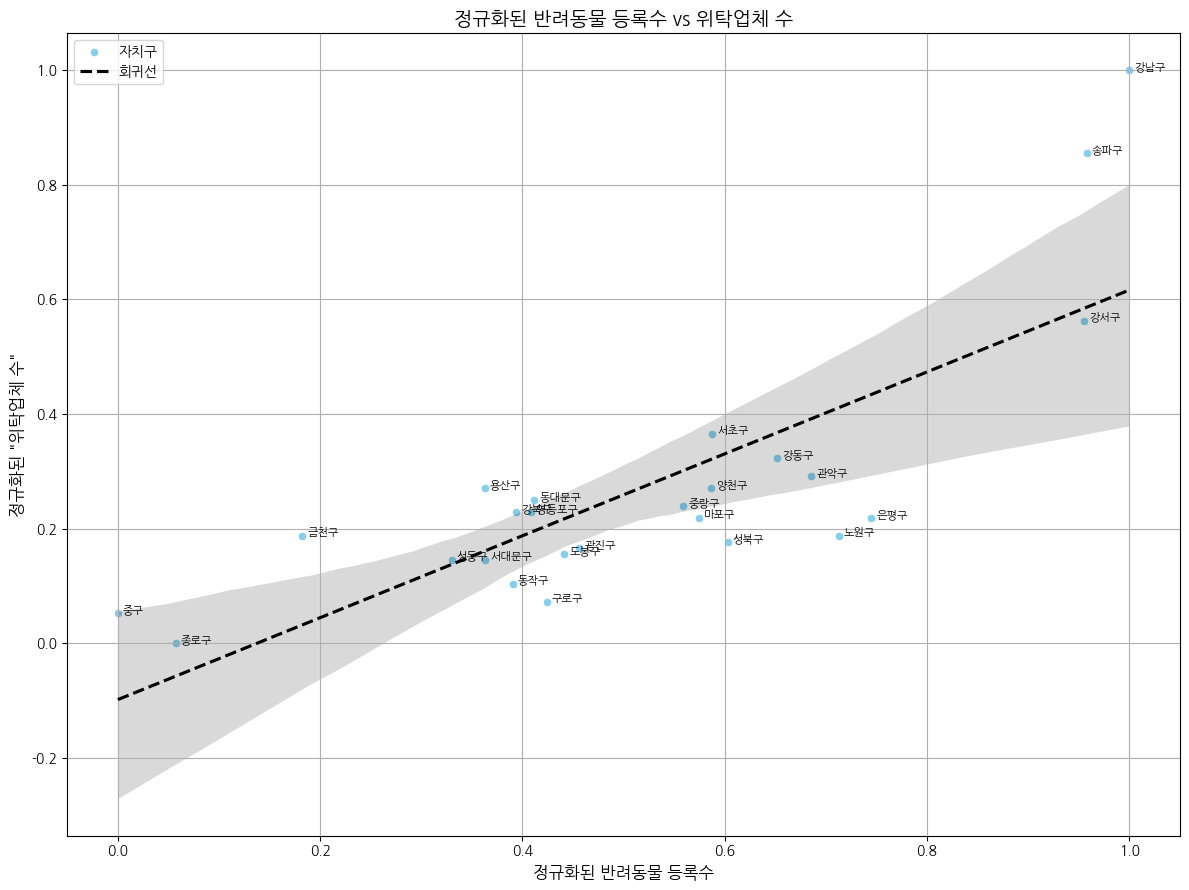

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os

# 예시 데이터 불러오기
facility_df = pd.DataFrame({
    'district': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
                 '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
                 '용산구', '은평구', '종로구', '중구', '중랑구'],
    'hospital_count': [94, 47, 27, 50, 27, 33, 29, 16, 45, 26, 32, 21, 47, 27, 53, 26, 34, 83, 49, 37, 28, 42, 12, 19, 31],
    'beauty_count': [154, 87, 56, 101, 57, 56, 45, 40, 83, 59, 57, 43, 61, 50, 85, 50, 74, 143, 68, 59, 41, 77, 13, 19, 70],
    'pharmacy_count': [287, 156, 69, 146, 118, 89, 92, 62, 117, 73, 92, 67, 115, 78, 158, 66, 87, 180, 83, 116, 32, 125, 81, 57, 88],
    'animal_trust_count': [102, 37, 28, 60, 34, 22, 13, 24, 24, 21, 30, 16, 27, 20, 41, 20, 23, 88, 32, 28, 32, 27, 6, 11, 29]
})

register_df = pd.DataFrame({
    'district': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
                 '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
                 '용산구', '은평구', '종로구', '중구', '중랑구'],
    'total_registered': [34843, 25515, 18585, 33636, 26408, 20272, 19412, 12925, 27138, 19873,
                         19074, 18509, 23441, 17781, 23786, 16889, 24200, 33706, 23770, 18997,
                         17760, 28005, 9577, 8042, 23018]
})

df = pd.merge(facility_df, register_df, on='district')

# 정규화
scaler = MinMaxScaler()
df[['total_registered_norm', 'animal_trust_count_norm']] = scaler.fit_transform(df[['total_registered', 'animal_trust_count']])

# 회귀선 기울기 계산 (정규화된 데이터 사용)
slope, intercept = np.polyfit(df['total_registered_norm'], df['animal_trust_count_norm'], 1)
print(f"정규화된 회귀선 기울기: {slope:.4f}, 절편: {intercept:.4f}")

# 시각화
plt.figure(figsize=(12, 9))

# 산점도
sns.scatterplot(data=df, x='total_registered_norm', y='animal_trust_count_norm', color='skyblue', label='자치구')

# 회귀선
sns.regplot(data=df, x='total_registered_norm', y='animal_trust_count_norm',
            scatter=False, color='black', line_kws={"linestyle": "dashed"}, label='회귀선')

# 라벨 추가
for i in range(df.shape[0]):
    plt.text(x=df.loc[i, 'total_registered_norm'] + 0.005,
             y=df.loc[i, 'animal_trust_count_norm'],
             s=df.loc[i, 'district'],
             fontsize=8)

plt.title('정규화된 반려동물 등록수 vs 위탁업체 수', fontsize=14)
plt.xlabel('정규화된 반려동물 등록수', fontsize=12)
plt.ylabel('정규화된 "위탁업체 수"', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()


# # 이미지 저장
# output_path = '/home/jiming/dev_ws/eda-repo-3/RESULT/visualization/정규화/정규화_위탁업체_병원수.png'
# os.makedirs(os.path.dirname(output_path), exist_ok=True)
# plt.savefig(output_path, dpi=300, bbox_inches='tight')
# plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# .env 파일 로드
load_dotenv("env")

# 환경변수에서 DB 정보 불러오기
host = os.getenv("DB_HOST")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
database = os.getenv("DB_NAME")

# MySQL 연결
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:3306/{database}")

# ▶️ 공원 정보 가져오기
query = """
SELECT district_category_2, per_capita_park_area_sqm, per_capita_urban_park_area_sqm, per_capita_walkable_park_area_sqm
FROM per_capita_park_area
WHERE district_category_2 NOT LIKE "서울대공원"
ORDER BY district_category_2;
"""

df = pd.read_sql(query, engine)
df.columns = ['자치구', '1인당 공원 면적', '1인당 도시공원 면적', '1인당 도보생활권공원 면적']

# ▶️ 반려동물 등록 수 데이터 (예시)
register_df = pd.DataFrame({
    'district': ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
                 '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
                 '용산구', '은평구', '종로구', '중구', '중랑구'],
    'total_registered': [34843, 25515, 18585, 33636, 26408, 20272, 19412, 12925, 27138, 19873,
                         19074, 18509, 23441, 17781, 23786, 16889, 24200, 33706, 23770, 18997,
                         17760, 28005, 9577, 8042, 23018]
})

# ▶️ 공원 데이터 + 등록 수 병합
df_merged = pd.merge(df, register_df, left_on='자치구', right_on='district')

# ▶️ Top 5 / Bottom 5 자치구 추출 (도시공원 면적 기준)
top5 = df_merged.nlargest(5, '1인당 도시공원 면적')
bottom5 = df_merged.nsmallest(5, '1인당 도시공원 면적')
middle = df_merged[~df_merged['자치구'].isin(top5['자치구']) & ~df_merged['자치구'].isin(bottom5['자치구'])]

import numpy as np  # 꼭 있어야 함


# 정규화
scaler = MinMaxScaler()
df[['total_registered_norm', '1인당 도시공원 면적_norm']] = scaler.fit_transform(df[['total_registered', '1인당 도시공원 면적']])



# 회귀선 기울기 및 절편 계산
slope, intercept = np.polyfit(df_merged['total_registered'], df_merged['1인당 도시공원 면적'], 1)
print(f"회귀선 기울기: {slope:.4f}, 절편: {intercept:.2f}")


# ▶️ 시각화
plt.figure(figsize=(12, 9))

# 기타 중간 그룹
sns.scatterplot(data=middle, x='total_registered', y='1인당 도시공원 면적', label='기타 지역', color='gray')

# Top5 (파랑)
sns.scatterplot(data=top5, x='total_registered', y='1인당 도시공원 면적', label='도시공원 면적 상위 5개', color='blue')

# Bottom5 (빨강)
sns.scatterplot(data=bottom5, x='total_registered', y='1인당 도시공원 면적', label='도시공원 면적 하위 5개', color='red')

# 회귀선 (신뢰구간 포함)
sns.regplot(data=df_merged, x='total_registered', y='1인당 도시공원 면적',
            scatter=False, color='black', line_kws={"linestyle": "dashed"}, label='회귀선')

# 자치구 이름 라벨 표시
for i in range(df_merged.shape[0]):
    plt.text(
        x=df_merged.loc[i, 'total_registered'] + 300,
        y=df_merged.loc[i, '1인당 도시공원 면적'],
        s=df_merged.loc[i, '자치구'],
        fontsize=8
    )

# 제목 및 축 설정
plt.title('반려동물 등록수 vs 1인당 도시공원 면적', fontsize=14)
plt.xlabel('반려동물 등록수', fontsize=12)
plt.ylabel('1인당 도시공원 면적 (㎡)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'None' ([Errno -3] Temporary failure in name resolution)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)